# Import stuff and set default parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import qutip
import scipy
from scipy import optimize
from qutip import *
import time
from functionsSqueeze import *

Units: time in $\mu s$ and circular frequency in MHz<br/>
    $\hbar$ is set to 1 => the hamiltonian has unit MHz

In [9]:
n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQQ = np.linspace(-1, 2.5, 351)
argsQQ = {'n': n,
       'omega': wQQ,
       'omegaDt': wQQdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, -0.801*w0, 0.18, 2*T+1.8098867063776491],
       'f0': 100/(9*10**-15)}

timesQ = np.linspace(-1, 1, 200)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

timesNix = np.linspace(-0, 2, 100)
argsNix = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, 0, 0.18, 0, 0, 0.],
       'f0': 50/(9*10**-15)}

timesQP = np.linspace(-0.8,1, 900)
argsQP = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.5*w0, 0.18, 0.3*w0, 4*np.pi/(2*w0), 0.3],
       'f0': 0.002/(9*10**-15)}

# run the time evolution for one set of parameters above

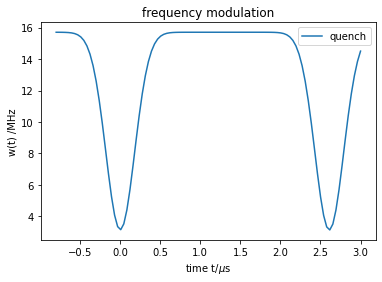

In [10]:
# plot different frequency modulations, to check that they are what I want them to be
tlist = np.linspace(-0.8,3,100)

wQuench2 = wQQ(tlist, argsQQ['omegaArgs'])
# wQuench = wQP(tlist, argsQ['omegaArgs'])
# wParam = wQP(tlist, argsP['omegaArgs'])
# wBoth = wQP(tlist, argsQP['omegaArgs'])

plt.plot(tlist, wQuench2, label="quench")
# plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wParam, label="parametric")
# plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()
plt.title("frequency modulation")
plt.xlabel(r'time t/$\mu$s')
plt.ylabel(r'w(t) /MHz')
plt.show()

In [11]:
t1 = time.time()
# resultQ = mesolve(H, psi0, timesQ, args=argsQ)
resultQQ = mesolve(H, psi0, timesQQ, args=argsQQ)
# resultNix = mesolve(H, psi0, timesNix, args=argsNix)
# resultQP = mesolve(H, psi0, timesQP, args=argsQP)
print("processing time:", round(100*(time.time()-t1))/100, "s")

processing time: 43.78 s


processing time: 4.32 s


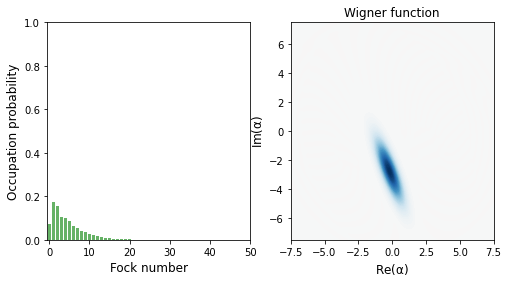

In [5]:
t1 = time.time()
result = resultQQ
psi = result.states[201]

plot_wigner_fock_distribution(psi)
plt.show
print("processing time:", round(100*(time.time()-t1))/100, "s")

|alpha|= (-0.1403083586143031-1.9461348278684893j) , xi = (0.5191052497511001+0.5056500236639082j) , nBar = 4.430891713696791 , nT = 0.010212311903446746
xi = 0.7246738623342661 exp(i x 0.7722687331018833 )


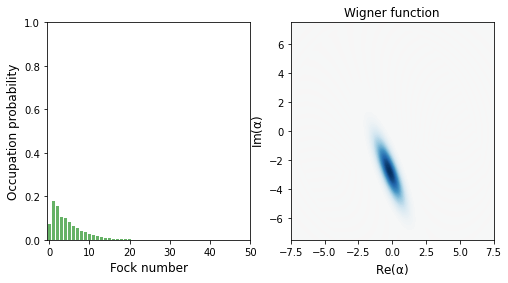

In [43]:
alpha, xi, nBar, nT = getParams(psi)
print('|alpha|=', alpha, ', xi =', xi, ', nBar =', nBar, ', nT =', nT)
print('xi =', np.abs(xi), 'exp(i x', np.angle(xi), ')')
psi1 = displace(n, alpha)*squeeze(n, xi)*thermal_dm(n, nT)*squeeze(n, xi).dag()*displace(n, alpha).dag()
plot_wigner_fock_distribution(psi1)
plt.show()

this checks if the retrieved (above) state is close to the original one (two above), if the angle of the squeezing has wrong sign, you have to calculate nT (which takes by far the most time in the calculation of getParams) <br/>
In the next plot the time evolutin of various parameters is shown

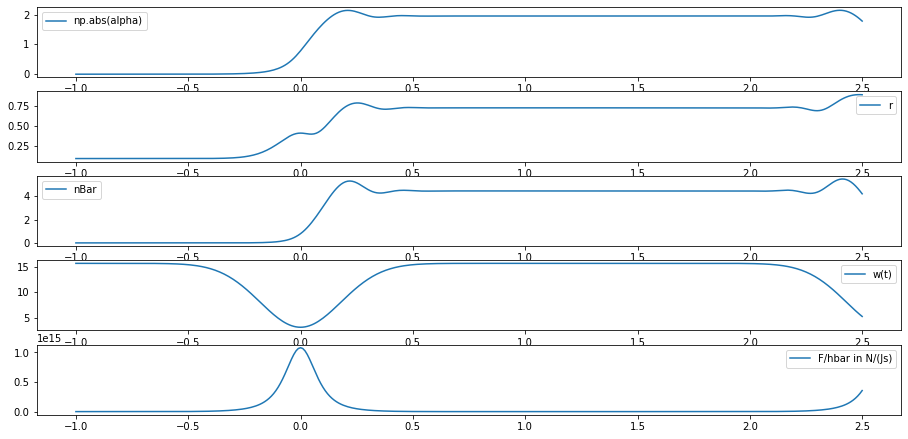

0

In [12]:
plotResults(timesQQ, resultQQ, argsQQ, calculate_nT = False, nSkipp = 1, showProgress = False)

# check how $\alpha$ and $\xi$ depend on the pulse shape

In [13]:
dts

array([0.04      , 0.05894737, 0.07789474, 0.09684211, 0.11578947,
       0.13473684, 0.15368421, 0.17263158, 0.19157895, 0.21052632,
       0.22947368, 0.24842105, 0.26736842, 0.28631579, 0.30526316,
       0.32421053, 0.34315789, 0.36210526, 0.38105263, 0.4       ,
       0.5       , 0.6       , 0.7       , 0.8       , 0.9       ,
       1.        , 1.1       , 1.2       , 1.3       , 1.4       ,
       1.5       , 1.6       ])

In [14]:
# FINISHED - DO NOT ACCIDENTLY CHANGE
# choose different pulse lengths and see what impact that has on alpha and xi

n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQ = np.linspace(-1, 1, 200)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

dts = np.linspace(0.04, 0.4, 19, endpoint = False) # from 0.1T to 3T
dts = np.append(dts, np.linspace(0.4, 1.6, 13))
xis = []
alphas = []
for dt in dts:
    argsQ['omegaArgs'][2] = dt
    result = mesolve(H, psi0, timesQ, args=argsQ)
    alpha, xi,_,_ = getParams(result.states[-1], calculate_nT = False)
    
    xis.append(np.abs(xi))
    alphas.append(np.abs(alpha))
    print('\r', "Progress:", round(100*(dt-dts[0])/(dts[-1]-dts[0])), "%", end = '')

 Progress: 100.0 %

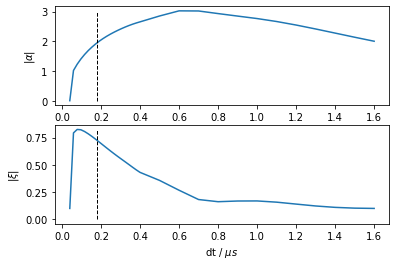

In [15]:
# FINISHED - DO NOT ACCIDENTLY CHANGE
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(dts, alphas)
ax1.plot([0.18, 0.18], [0., max(alphas)], 'k--', linewidth=1)
ax1.set_ylabel(r'$|\alpha|$')
ax2.plot(dts, xis)
ax2.plot([0.18, 0.18], [0., max(xis)], 'k--', linewidth=1)
ax2.set_ylabel(r'$|\xi|$')
ax2.set_xlabel(r'dt / $\mu s$')
plt.show()

coherent displacement and squeezing depending on the pulse duration <br/>
For a gaussian pulse with minimum $\Delta \omega = -0.8 \omega_0$ and pulse durations $dt$ between $0.1 T$ and $2.2 T$ (with $T = 2 \pi/\omega_0$), the coherent displacement $|\alpha |$ and the squeezing $|\xi |$ are calculated. $|\alpha |$ rises monoton and $|\xi |$ has a maximum at very short pulse durations and decreases monotonly for higher $dt$. This shows that a single gaussian pulse is not sufficent to create a squeezed state without coherent displacement. <br/>
The dashed line indicates the pulse length of the pulses taken for further calculations (especially in the investigation of the double pulse sequence)

In [44]:
# check how alpha and xi (both r and t) depend on the pulse strength

n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQ = np.linspace(-1, 1, 200)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

dws = np.linspace(0, 0.8, 17)
xiRs = []
xiTs = []
alphas2 = []
alphasT2 = []
for dw in dws:
    argsQ['omegaArgs'][1] = -dw*w0
    result = mesolve(H, psi0, timesQ, args=argsQ)
    alpha, xi,_,_ = getParams(result.states[-1], calculate_nT = False)
    
    xiRs.append(np.abs(xi))
    if np.angle(xi)<0:
        xiTs.append(np.angle(xi) + 2*np.pi)
    else:
        xiTs.append(np.angle(xi))
    
    alphas2.append(np.abs(alpha))
    if np.angle(alpha)<0:
        alphasT2.append(np.angle(alpha) + 2*np.pi)
    else:
        alphasT2.append(np.angle(alpha))
        
    print('\r', "Progress:", round(100*(dw-dws[0])/(dws[-1]-dws[0])), "%", end = '')

 Progress: 100.0 %

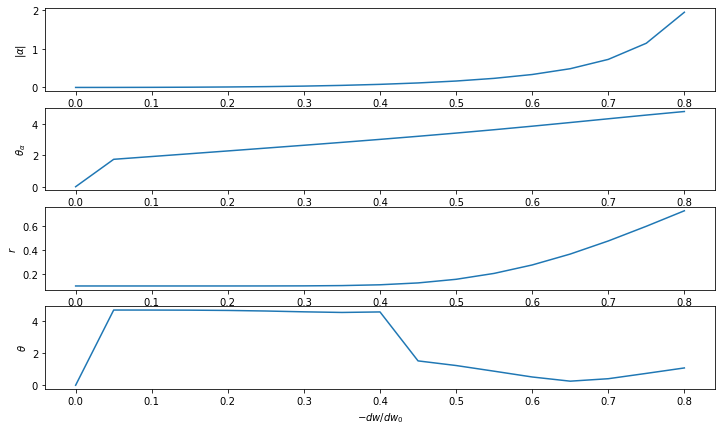

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(12, 7, forward=True)
ax1.plot(dws, alphas2)
ax1.set_ylabel(r'$|\alpha|$')

ax2.plot(dws, alphasT2)
ax2.set_ylabel(r'$\theta_\alpha$')

ax3.plot(dws, xiRs)
ax3.set_ylabel(r'$r$')

ax4.plot(dws, xiTs)
ax4.set_ylabel(r'$\theta$')
ax4.set_xlabel(r'$- dw / dw_0$')
plt.show()

dependence of $\alpha$ and $\xi = r e^\theta$ on the pulse strength $\Delta$w

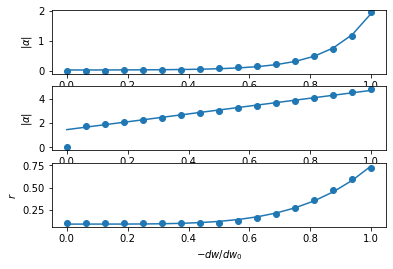

params for alpha: [1.00398440e-03 7.54397528e+00 1.96151888e-02] Errors: [5.05609276e-08 5.18454631e-02 9.83173120e-05]
params for alpha_T: [3.23949305 1.46292247] Errors: [0.00255979 0.00093492]
params for xiR: [0.65237181 4.43040851 0.09222313] Errors: [1.33492771e-04 2.79816686e-02 2.25094345e-05]


In [24]:
# fit a quadratic polynom on the minimum to get a more exact position
def fitFktPol(x, a, b, c):
    return(a*(x**b) + c)

def fitFktExp(x, a, b, c):
    return(a*np.exp(b*x) + c)

def fitFktLin(x, a, b):
    return(a*x+b)

xFit = dws/0.8
paramsA, paramsA_err = optimize.curve_fit(fitFktExp, xFit, alphas2, p0 = [1, 1, 0]) # do the fit for alpha
paramsAT, paramsAT_err = optimize.curve_fit(fitFktLin, xFit[1:], alphasT2[1:], p0 = [0, 0]) # do the fit for alpha, angle in C
paramsX, paramsX_err = optimize.curve_fit(fitFktPol, xFit, xiRs, p0 = [1, 1, 0]) # do the fit for xi

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(8, 5, forward=True)

ax1.scatter(xFit, alphas2)
ax1.plot(xFit, fitFktExp(xFit, paramsA[0], paramsA[1], paramsA[2]))
ax1.set_ylabel(r'$|\alpha|$')

ax2.scatter(xFit, alphasT2)
ax2.plot(xFit, fitFktLin(xFit, paramsAT[0], paramsAT[1]))
ax2.set_ylabel(r'$\theta_\alpha$')

ax3.scatter(xFit, xiRs)
ax3.plot(xFit, fitFktPol(xFit, paramsX[0], paramsX[1], paramsX[2]))
ax3.set_ylabel(r'$r$')
ax3.set_xlabel(r'$- dw / dw_0$')
plt.show()

print("params for alpha:", paramsA, "Errors:", np.diagonal(paramsA_err))
print("params for alpha_T:", paramsAT, "Errors:", np.diagonal(paramsAT_err))
print("params for xiR:", paramsX, "Errors:", np.diagonal(paramsX_err))

Fit of a polynomial or exponential function on the developement of dw <br/>
One finds that for the coherent displacement $\alpha$, an exponential fit of the form $\alpha(dw) = a \cdot exp(b \cdot dw) + c$ gives the best results. For the squeezing parameter $r$ a polynomial Fit of the form $r(dw) = a \cdot (dw)^b + c$ gives the best result.

# Example of the Spin-Phonon-Coupling Hamiltonian

9 s


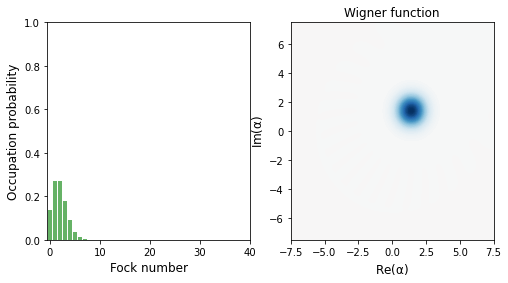

In [7]:
n = 20
t1 = time.time()
# psiPS = tensor(fock_dm(2, 0), fock_dm(n, 2)) # single fock state
psiPS = tensor(fock_dm(2, 0), 0.5*(fock_dm(n, 1)+fock_dm(n, 4))) # superposition of fock states
psiPS = tensor(fock_dm(2, 0), coherent_dm(n, 1+1j)) # single fock state

n_LD = 0.1

w0 = 2*np.pi*2.5
wz = w0
Omega = 2*np.pi*3.7

pg = tensor(Qobj([[1,0],[0,0]]), qeye(n)) # projector on the ground state

times = np.linspace(0, 12, 600)
res = mesolve(H_spin_phonon_coupling(w0, wz, Omega, n_LD, n), psiPS, times)
plot_wigner_fock_distribution(psiPS)
print(round(time.time()-t1), "s")

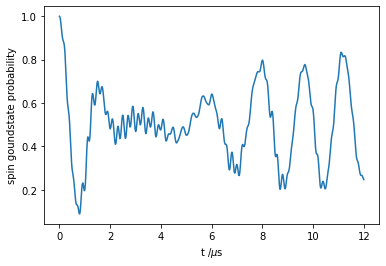

In [72]:
psi_g = expect(pg, res.states)
plt.plot(times, psi_g)
plt.xlabel(r't /$\mu$s')
plt.ylabel(r'spin goundstate probability')
plt.show()

occupation probability of the spin ground state (initial in the spin excited state) as a function of time, considering the spin phonon coupling Hamiltonian

In [55]:
RabiTPSR(Omega, 1, 0, n_LD)

2.313183682197804

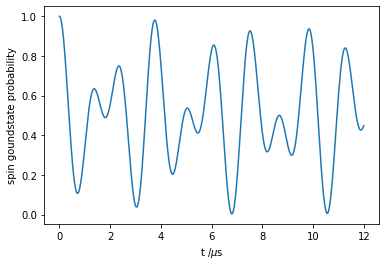

In [56]:
# probs = 0.5*(1+np.cos(RabiTPSR(Omega, 2, 3, n_LD)*times)) # single fock state
probs = 0.5*(1+0.5*np.cos(RabiTPSR(Omega, 1, 2, n_LD)*times) + 0.5*np.cos(RabiTPSR(Omega, 4, 5, n_LD)*times)) # superposition of fock states
plt.plot(times, probs)
plt.xlabel(r't /$\mu$s')
plt.ylabel(r'spin goundstate probability')
plt.show()

Expected ground state occupation.<br/>
Ground state occupation calculated with formula (95) of LBM+03 with the values from above (simulated ground state occupation). For results similar to the simulation, the Lamb Dicke parameter needs to be small and the motional frequency $w_z$ must be the same as the spin frequency $w_0$.

In [28]:
Lpol

poly1d([-0.16666667,  2.        , -6.        ,  4.        ])

In [35]:
scipy.special.factorial(4)

24.0

In [11]:
if False:
    print(1)
elif True:
    print(2)    

2
